## Generating code
In this notebook we will produce some image processing Python code and execute it to see if it works. We will build up the query gradually to demonstrate that short concise high quality code depends on the details we present in the prompt.

In [ ]:
import os
os.environ['OPENAI_API_KEY'] = 'sk-...' #todo: enter your API key here

In [1]:
import openai
from IPython.display import Markdown

def prompt(message:str, model="gpt-3.5-turbo"):
    """A prompt helper function that sends a message to openAI
    and returns only the text response.
    """
    client = openai.OpenAI()
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": message}]
    )
    return response.choices[0].message.content

In [2]:
query1 = """
Write python code to open the image file 'data/blobs.tif' 
and threshold it using Otsu's method.
Apply connected component labeling to the result to retrieve a label image.
Visualize the label image.
"""

code = prompt(query1)
Markdown(code)

Here is the python code to achieve the task:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('data/blobs.tif', 0)

# Apply Otsu's thresholding
_, thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply connected component labeling
num_labels, labels = cv2.connectedComponents(thresholded)

# Visualize the label image
plt.figure(figsize=(10, 10))
plt.imshow(labels, cmap='nipy_spectral')
plt.colorbar()
plt.show()
```

Make sure you have the necessary libraries (OpenCV, NumPy, and Matplotlib) installed in your Python environment before running the code.

In [3]:
query2 = query1 + """
Do not explain the solution. 
Only write Python code and short comments are ok.
"""
code = prompt(query2)
Markdown(code)

```python
import cv2
import numpy as np

# Read the image
img = cv2.imread('data/blobs.tif', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply connected component labeling
num_labels, label_image = cv2.connectedComponents(thresh)

# Visualize the label image
cv2.imshow('Label Image', label_image.astype(np.uint8) * 50)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In [4]:
query3 = query2 + """
Assume the code is executed in a Jupyter notebook.

Do not use any of these Python libraries:
* OpenCV
* PIL
* Pillow
"""
code = prompt(query3)
Markdown(code)

```python
import matplotlib.pyplot as plt
from skimage import io, filters, measure

# Load the image
image = io.imread('data/blobs.tif')

# Threshold using Otsu's method
thresh = filters.threshold_otsu(image)
binary_image = image > thresh

# Connected component labeling
label_image = measure.label(binary_image)

# Visualize the label image
plt.figure(figsize=(8,8))
plt.imshow(label_image, cmap='nipy_spectral')
plt.axis('off')
plt.show()
```

For completeness, we just print out the entiry query once again.

In [5]:
Markdown(query3)


Write python code to open the image file 'data/blobs.tif' 
and threshold it using Otsu's method.
Apply connected component labeling to the result to retrieve a label image.
Visualize the label image.

Do not explain the solution. 
Only write Python code and short comments are ok.

Assume the code is executed in a Jupyter notebook.

Do not use any of these Python libraries:
* OpenCV
* PIL
* Pillow


Next, we execute the code.

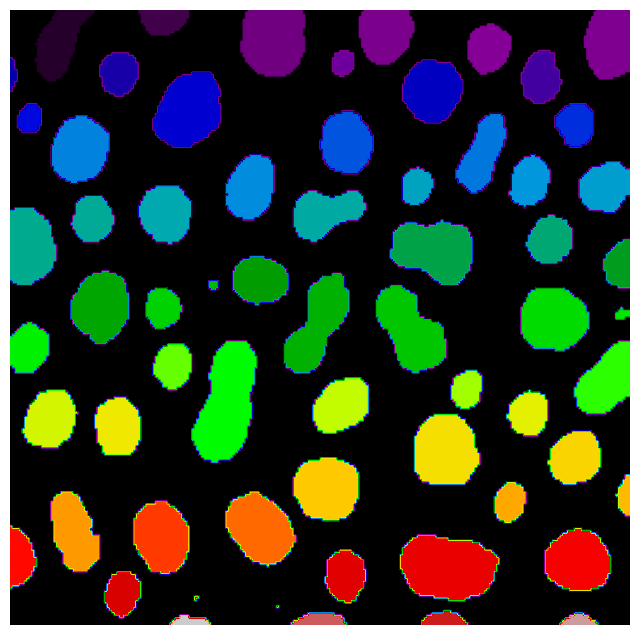

In [6]:
clean_code = code.replace('```python','').replace('```','')

exec(clean_code)